# Exercise 9

## 2-D Fourier Domain Filtering

In [1]:
%pylab inline
import scipy.linalg
import numpy.matlib
import cv2
import PIL
from scipy import misc

Populating the interactive namespace from numpy and matplotlib


Load Lena as grayscale image. 

In [2]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

Calculate the Fourier Transform, shift the DC-component to the center and log-scale it. Afterwards, show the image.

In [3]:
fft = np.fft.fftshift(np.fft.fft2(img))
magnitude_spectrum = 20 * np.log(1 + np.abs(fft))

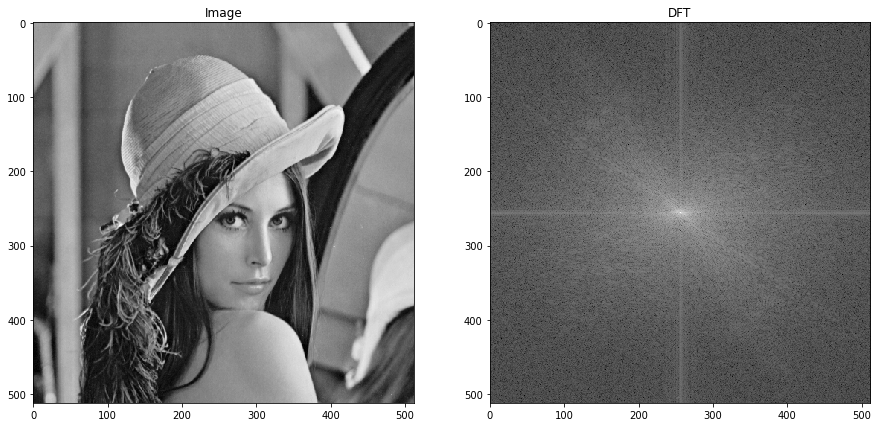

In [4]:
figure(figsize(15, 7))
plt.subplot(1,2,1), plt.imshow(img, 'gray'), plt.title("Image")
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum, 'gray'), plt.title("DFT");

Define a Gaussian blur and an average filter. Play around with the kernel size and inspect the images' DFT after applying the filter on Lena.

In [40]:
img_gauss = cv2.GaussianBlur(img, (13, 13), 5)
img_movA = cv2.blur(img, (17, 17))

img_movA = np.where(img_movA > 255, 255, img_movA)
img_movA = np.where(img_movA < 0, 0, img_movA)


In [41]:
fft_gauss = np.fft.fftshift(np.fft.fft2(img_gauss))
fft_movA = np.fft.fftshift(np.fft.fft2(img_movA))
mSpecGauss = 20 * np.log(1 + np.abs(fft_gauss))
mSpecMovA = 20 * np.log(1 + np.abs(fft_movA))
print(mSpecMovA[256,256])

347.25336856719144


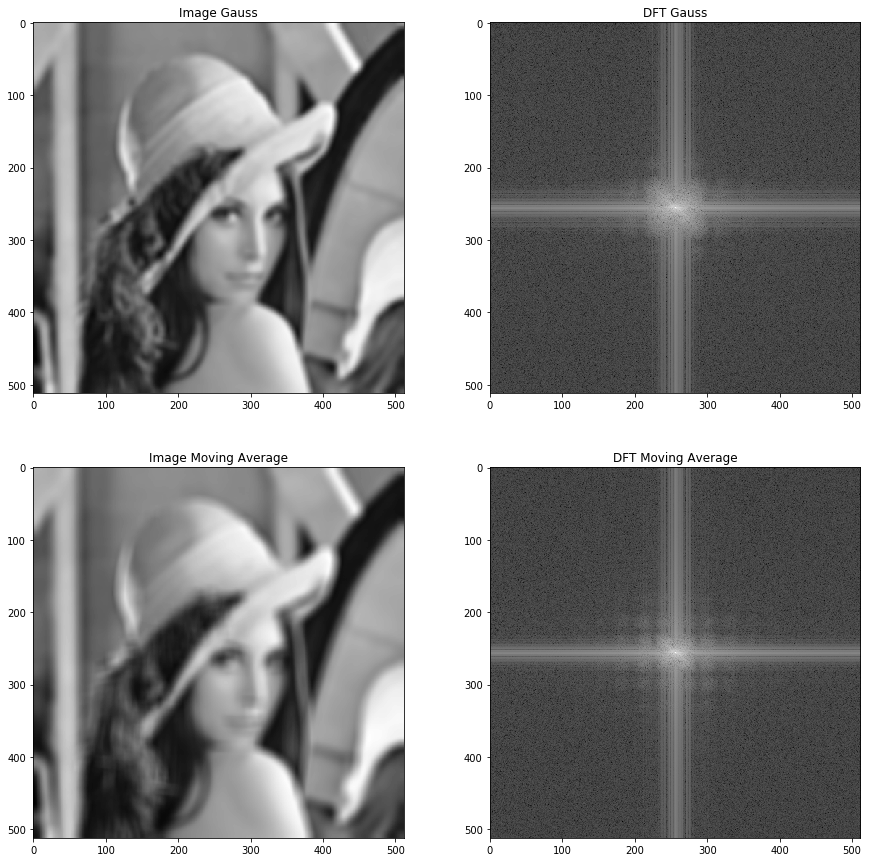

In [42]:
figure(figsize(15, 15))
plt.subplot(2,2,1), plt.imshow(img_gauss, 'gray'), plt.title("Image Gauss")
plt.subplot(2,2,2), plt.imshow(mSpecGauss, 'gray'), plt.title("DFT Gauss");
plt.subplot(2,2,3), plt.imshow(img_movA, 'gray'), plt.title("Image Moving Average")
plt.subplot(2,2,4), plt.imshow(mSpecMovA, 'gray'), plt.title("DFT Moving Average");

## Walsh-Hadamard Transform

This Exercise is about the Walsh-Hadamard Transformation.

Create a regular Hadamard matrix.

In [15]:
N = 4
hm = [1]
n = 1
while n < N:
    hm = numpy.matlib.repmat(hm, 2, 2) #repmat repeats a given matrix n x m times
    hm[n:2*n,n:2*n] *= -1
    n = len(hm)
print(hm)

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


Each row of the Walsh-Hadamard matrix corresponds to one sampled Walsh function. Plot all rows of your Walsh Matrix!

C:\Users\Schirrmacher\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


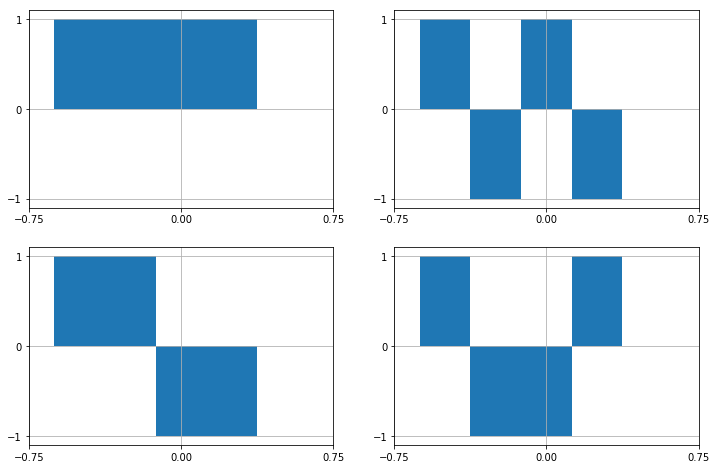

In [16]:
figure(figsize(12, 2*N))

for i in range(N):
    plt.subplot(N/2,2,i+1)
    plt.bar(linspace(-0.5, 0.5, N+1)[0:N], hm[i], 1/N)
    plt.xlim(-.75, 0.75), plt.ylim(-1.1, 1.1), plt.grid()
    plt.xticks(linspace(-.75, .75, N/2+1))
    plt.yticks(linspace(-1, 1, 3));

Now as you know how to create your own Hadamard Matrix, we can use the provided scipy function 'hadamard'.

In [17]:
N = 2**2
hm = scipy.linalg.hadamard(N)
print(hm)

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


C:\Users\Schirrmacher\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


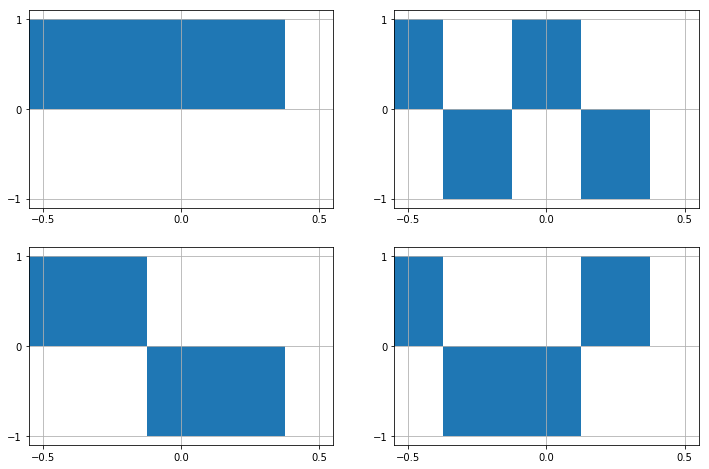

In [18]:
figure(figsize(12, 2*N))

for i in range(N):
    plt.subplot(N/2,2,i+1)
    plt.bar(linspace(-0.5, 0.5, N+1)[0:N], hm[i], 1/N)
    plt.xlim(-.55, 0.55), plt.ylim(-1.1, 1.1), plt.grid()
    plt.xticks(linspace(-.5, .5, N/2+1))
    plt.yticks(linspace(-1, 1, 3));

Write a function for creating the walsh matrix.
Follow the steps:

1) Create Hadamard matrix with a given N (input value)

2) for all n of N:

        i)Convert n to a string that contains the binary representation.
        
        ii)Pad the numeric string on the left with zero digits until the given width M is reached. 
        
        iii)Reverse the string
        
        iv)Convert string to array
        
3) xor adjacent columns

4) convert binary array representation to number

5) return the walsh matrix

In [19]:
def walsh(N):
    #1
    hm = scipy.linalg.hadamard(N)
    
    #2
    M = int(np.log2(N) + 1)
    binHadIdx = list()
    for n in range(N):
        #i
        bin_string = "{0:0b}".format(n).zfill(M)[::-1]
        #ii
        t = []
        for letter in bin_string:
            t.append(ord(letter) - ord('0'))
        #iii
        binHadIdx.append(t)
    #iv
    binHadIdx = np.asarray(binHadIdx)

    #3
    binSeqIdx = np.zeros((N, M))
    for k in range(M-1, 0, -1): 
        binSeqIdx[:,k] = np.bitwise_xor(binHadIdx[:,k], binHadIdx[:,k-1])
    binSeqIdx = np.mat(binSeqIdx, dtype=np.int)
    #4
    h = np.mat(np.power(2, range(M-1, -1, -1)))
    seqIdx = binSeqIdx * h.transpose()
    seqIdx = np.asarray(seqIdx).flatten()
    #5
    return hm[seqIdx]

Calculate the walsh matrix

In [20]:
wm = walsh(16)

Plot the hadamard and the walsh matrix.

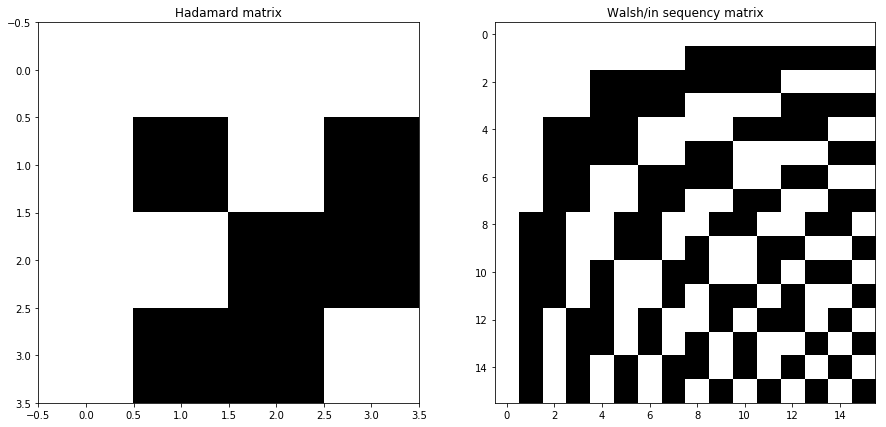

In [21]:
figure(figsize(15,7))
plt.subplot(1,2,1), plt.imshow(hm, interpolation='nearest', cmap='gray');
plt.title("Hadamard matrix")
plt.subplot(1,2,2), plt.imshow(wm, interpolation='nearest', cmap='gray');
plt.title("Walsh/in sequency matrix");

Apply the matrices on lena! Load the image and save the dimension, afterwards calculate the two corresponding matrices.

In [22]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
N, M = img.shape

In [23]:
img_mat = np.mat(img, dtype=np.int32);

In [24]:
hm = scipy.linalg.hadamard(N)
m = wm = walsh(N)
m = np.mat(m, dtype=np.int8)

Calculate the 2-D WHT and plot it.

In [25]:
wht1 = (m * img_mat * m.T) / N

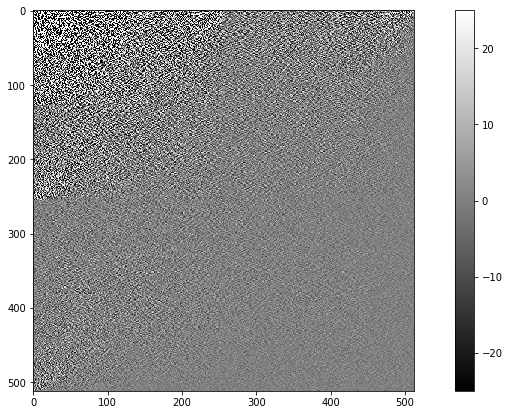

In [26]:
# Show values between [-c, +c]; larger values are set to +c, smaller ones to -c
c = 25
tmp = np.where(wht1 > c, c, wht1)
tmp = np.where(tmp < -c, -c, tmp)
plt.imshow(tmp, 'gray')
# plt.imshow(wht1[c:, c:], 'gray')
plt.colorbar();

Now recalculate the image from the WHT transformed image.

In [27]:
recon1 =  m.dot(wht1).dot(m.T) / N

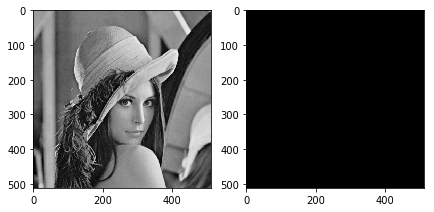

In [28]:
figure(figsize(7,7))
plt.subplot(1,2,1)
plt.imshow(recon1, 'gray');
plt.subplot(1,2,2)
plt.imshow(recon1-img, 'gray');

Set 75% of the high frequency components to zero

In [29]:
wht2 = wht1.copy()
wht2[:, int(N/2):] = 0
wht2[int(N/2):, :] = 0

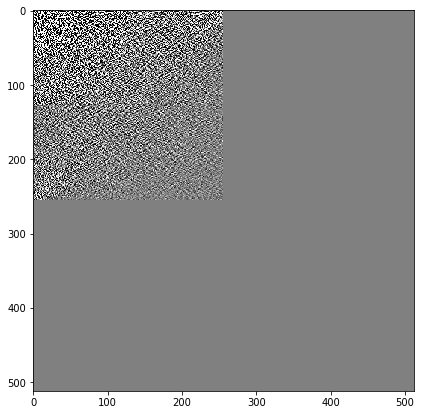

In [30]:
c = 25
tmp = np.where(wht2 > c, c, wht2)
tmp = np.where(tmp < -c, -c, tmp)
plt.imshow(tmp, 'gray')

In [31]:
recon2 = m.dot(wht2).dot(m.T) / N

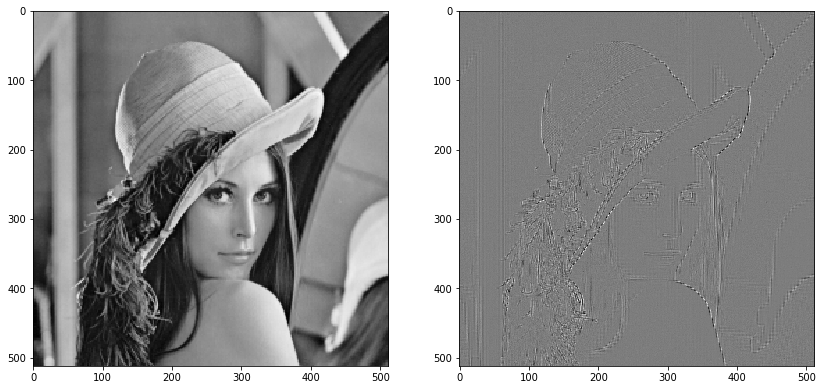

In [32]:
figure(figsize(14,14))
plt.subplot(1,2,1)
plt.imshow(recon2, 'gray');
plt.subplot(1,2,2)
plt.imshow(recon2-img, 'gray');

Set 93.75% of the high frequency components to zero

In [33]:
wht3 = wht1.copy()
wht3[:, int(N/16):] = 0
wht3[int(N/16):, :] = 0

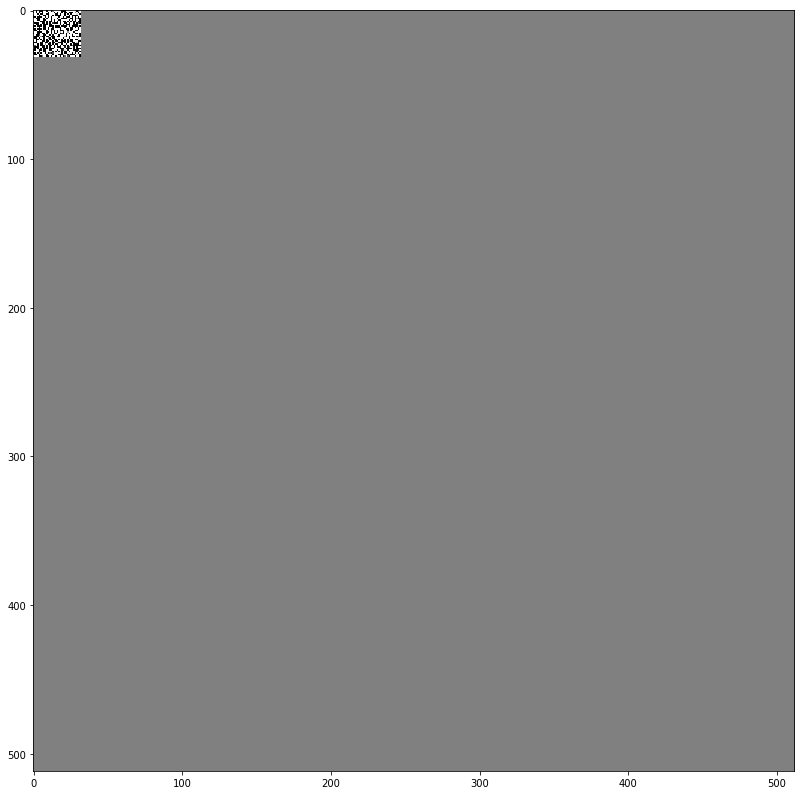

In [34]:
c = 25
tmp = np.where(wht3 > c, c, wht3)
tmp = np.where(tmp < -c, -c, tmp)
plt.imshow(tmp, 'gray')

In [35]:
recon3 = m.dot(wht3).dot(m.T) / N

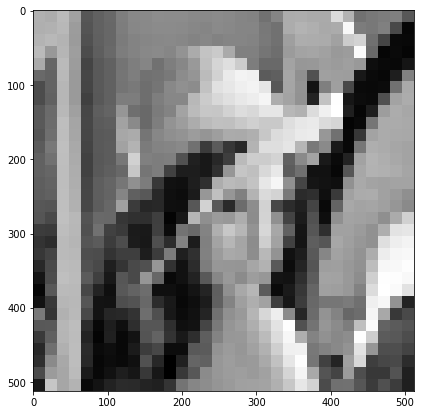

In [36]:
figure(figsize(7,7))
plt.imshow(recon3, 'gray');